# 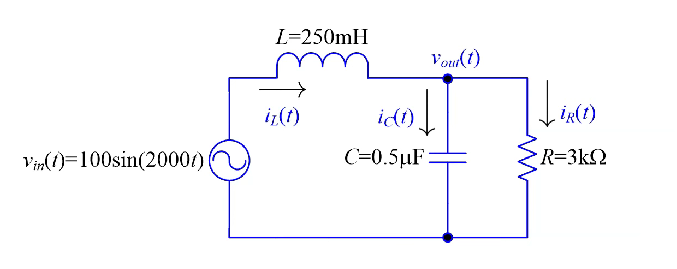

In [1]:
#%matplotlib qt5

Resistor Impedance = 3k Ω
Capacitor Impedance = 0.00-1000.00j Ω
Inductor Impedance = 0.00+500.00j Ω


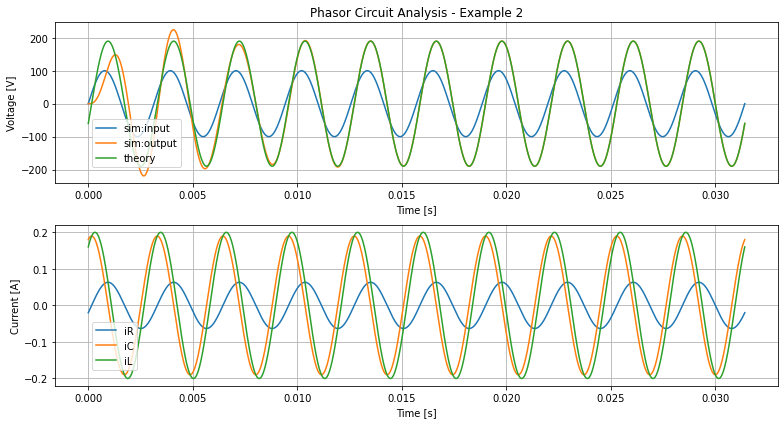

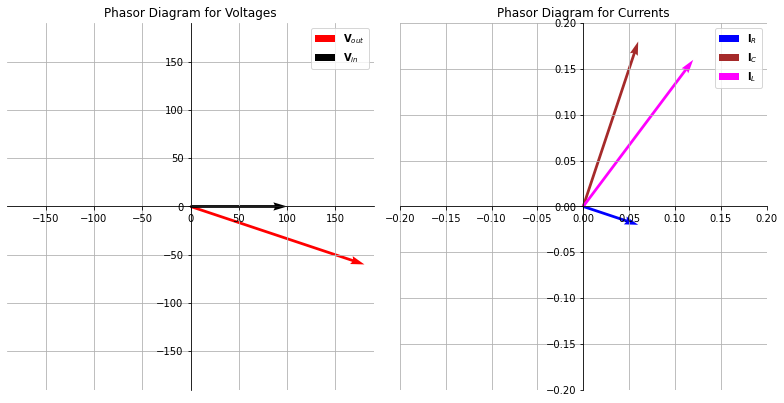

In [2]:
#*********************************************
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
from matplotlib.pyplot import semilogx
from matplotlib import pyplot

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

from engineering_notation import EngNumber

##********************************************
circuit = Circuit('RLC Circuit')

Va=100@u_V
f=(2/(2*math.pi))@u_kHz
Vo=0
Td=0
Df=0

circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd,
                                amplitude=Va, frequency = f, offset = Vo,
                                delay = Td, damping_factor =Df)
L1 = circuit.L(1, 'input', 'out', 250@u_mH)
R1 = circuit.R(1, 'out', circuit.gnd, 3@u_kΩ)
C1 = circuit.C(1, 'out', circuit.gnd, 0.5@u_uF)

steptime=1@u_us
transient_duration = 5*circuit.R1.resistance*circuit.C1.capacitance
finaltime = 10*(1/f)

##*****************************************
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=steptime, end_time=finaltime)

time=np.array(analysis.time)
Vin = Va
Z_R = circuit.R1.resistance
Z_C = (1/(1j* 2*math.pi*f*circuit.C1.capacitance))
Z_L = 1j* 2*math.pi*f*circuit.L1.inductance

Vout = ((Z_C*Z_R)/(Z_L*Z_C + Z_R*Z_C + Z_R*Z_L))*Vin
vout = abs(Vout)*np.sin(2*math.pi*f*time+np.angle(Vout))

IC = Vout/Z_C
IR = Vout/Z_R
IL = (Vin-Vout)/Z_L

iC = abs(IC)*np.sin(2*math.pi*f*time+np.angle(IC))
iR = abs(IR)*np.sin(2*math.pi*f*time+np.angle(IR))
iL = abs(IL)*np.sin(2*math.pi*f*time+np.angle(IL))

print('Resistor Impedance = {} Ω'.format(EngNumber(float(Z_R))))
print('Capacitor Impedance = {:.2f} Ω'.format(Z_C))
print('Inductor Impedance = {:.2f} Ω'.format(Z_L))


##*********************************************
## Plotting Simulation Results

figure = plt.subplots(figsize=(11, 6))

axe = plt.subplot(211)
plt.title('Phasor Circuit Analysis - Example 2')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plot(analysis['input'], axis=axe)
plot(analysis['out'], axis=axe)
plt.plot(time, vout)
plt.legend(('sim:input', 'sim:output', 'theory'), loc=(.05,.1))


axe = plt.subplot(212)
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.grid()
plt.plot(time, iR)
plt.plot(time, iC)
plt.plot(time, iL)
plt.legend(('iR', 'iC', 'iL'), loc=(.05,.1))
cursor = Cursor(axe, useblit=True, color='red', linewidth=1)

plt.tight_layout()
plt.show()

##********************************************

figure = plt.subplots(figsize=(11, 6))
axe = plt.subplot(121)

plt.title('Phasor Diagram for Voltages')
axe.quiver(0, 0, np.array((np.real(Vout))), np.array((np.imag(Vout))),units='xy' ,scale=1, color='red')
axe.quiver(0, 0, float(Vin), 0,units='xy' ,scale=1,color='black')

plt.grid()
axe.set_aspect('equal')
axe.spines['left'].set_position('zero')
axe.spines['right'].set_color('none')
axe.spines['bottom'].set_position('zero')
axe.spines['top'].set_color('none')

limit = max(float(Vin),np.amax(abs(Vout)))
plt.xlim(-limit,limit)
plt.ylim(-limit,limit)
plt.legend(('$\mathbf{V}_{out}$', '$\mathbf{V}_{in}$'))

axe = plt.subplot(122)

plt.title('Phasor Diagram for Currents')

axe.quiver(0, 0, np.array((np.real(IR))), np.array((np.imag(IR))),units='xy' ,scale=1, color='blue')
axe.quiver(0, 0, np.array((np.real(IC))), np.array((np.imag(IC))),units='xy' ,scale=1, color='brown')
axe.quiver(0, 0, np.array((np.real(IL))), np.array((np.imag(IL))),units='xy' ,scale=1, color='magenta')

plt.grid()
axe.set_aspect('equal')
axe.spines['left'].set_position('zero')
axe.spines['right'].set_color('none')
axe.spines['bottom'].set_position('zero')
axe.spines['top'].set_color('none')

limit = max(np.amax(abs(IR)),np.amax(abs(IC)),np.amax(abs(IL)))
plt.xlim(-limit,limit)
plt.ylim(-limit,limit)
plt.legend(('$\mathbf{I}_{R}$', '$\mathbf{I}_{C}$', '$\mathbf{I}_{L}$'))

plt.tight_layout()
plt.show()


